In [1]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from interaction_permutation_importance import *
import matplotlib.pyplot as plt



def gen_X(num_var: int, sample_size : int):
    data_dictionary = {}
    for i in range(num_var):
        var_name = "x" + f"{i + 1}"
        data_dictionary[var_name] = list(np.random.binomial(1, .5, sample_size))
    return pd.DataFrame(data_dictionary)

sys.path.append('/root/barcode/')
from BarcodeScanner import tree_and_clustering, base_barcode

In [85]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 + seq.x1 + seq.x2 + seq.x3 + seq.x3 *seq.x2 + np.random.normal() , axis = 1)

In [86]:
clustering = anova_clustering(df.iloc[:, :-1], df.y)

In [89]:
pd.DataFrame(clustering.get_projected_beta_hat_var(5))

,0,1,2,3,4,5,6,7
0,0.011945,-0.011945,-0.011945,-0.011945,0.011945,0.011945,0.011945,-0.011945
1,-0.011945,0.016858,0.016858,0.016858,-0.021771,-0.021771,-0.021771,0.026683
2,-0.011945,0.016858,0.016858,0.016858,-0.021771,-0.021771,-0.021771,0.026683
3,-0.011945,0.016858,0.016858,0.016858,-0.021771,-0.021771,-0.021771,0.026683
4,0.011945,-0.021771,-0.021771,-0.021771,0.037987,0.037987,0.031596,-0.054204
5,0.011945,-0.021771,-0.021771,-0.021771,0.037987,0.037987,0.031596,-0.054204
6,0.011945,-0.021771,-0.021771,-0.021771,0.031596,0.031596,0.041136,-0.050962
7,-0.011945,0.026683,0.026683,0.026683,-0.054204,-0.054204,-0.050962,0.099549


In [93]:
x = list(range(1, 9))*8
y = []
for i in range(1, 9):
    y += [i]*8

In [104]:
df = pd.DataFrame(zip(x, y, clustering.get_projected_beta_hat_var(5).reshape(-1)), columns = ['x','y','z'])
df_1 = pd.DataFrame(zip(x, y, clustering.init_beta_var.reshape(-1)), columns = ['x','y','z'])

In [137]:
X, Y = np.meshgrid(range(1, 9), range(1, 9))
Z = clustering.init_beta_var

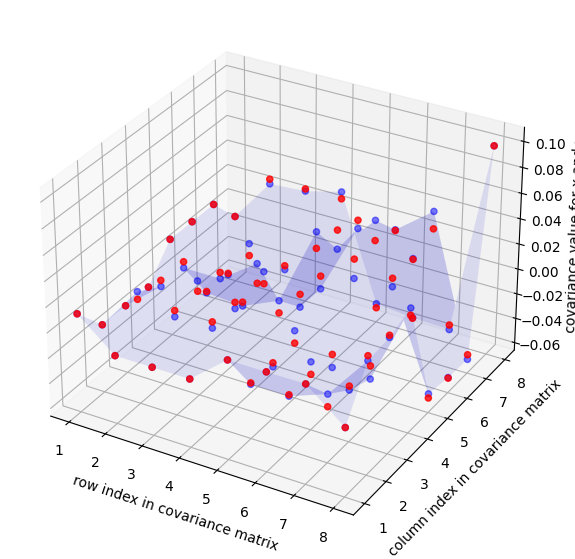

In [170]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs = df_1.x, ys = df_1.y, zs = df_1.z, color = 'blue', alpha = .5)
ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.1)

ax.scatter(xs = df.x, ys = df.y, zs = df.z, color = 'red', alpha = 0.8)

ax.set_xlabel('row index in covariance matrix')
ax.set_ylabel('column index in covariance matrix')
ax.set_zlabel('covariance value for x and y')

fig.savefig('covariance_before_after_clustering.png')

In [92]:
clustering.get_projected_beta_hat_var(5).reshape(-1)

array([ 0.01194489, -0.01194489, -0.01194489, -0.01194489,  0.01194489,
        0.01194489,  0.01194489, -0.01194489, -0.01194489,  0.0168577 ,
        0.0168577 ,  0.0168577 , -0.02177052, -0.02177052, -0.02177052,
        0.02668334, -0.01194489,  0.0168577 ,  0.0168577 ,  0.0168577 ,
       -0.02177052, -0.02177052, -0.02177052,  0.02668334, -0.01194489,
        0.0168577 ,  0.0168577 ,  0.0168577 , -0.02177052, -0.02177052,
       -0.02177052,  0.02668334,  0.01194489, -0.02177052, -0.02177052,
       -0.02177052,  0.03798703,  0.03798703,  0.03159615, -0.05420354,
        0.01194489, -0.02177052, -0.02177052, -0.02177052,  0.03798703,
        0.03798703,  0.03159615, -0.05420354,  0.01194489, -0.02177052,
       -0.02177052, -0.02177052,  0.03159615,  0.03159615,  0.04113591,
       -0.05096154, -0.01194489,  0.02668334,  0.02668334,  0.02668334,
       -0.05420354, -0.05420354, -0.05096154,  0.09954908])

In [88]:
clustering.init_beta_var

array([[ 0.01194489, -0.01194489, -0.01194489, -0.01194489,  0.01194489,
         0.01194489,  0.01194489, -0.01194489],
       [-0.01194489,  0.02288867,  0.01194489,  0.01194489, -0.02288867,
        -0.02288867, -0.01194489,  0.02288867],
       [-0.01194489,  0.01194489,  0.02493874,  0.01194489, -0.02493874,
        -0.01194489, -0.02493874,  0.02493874],
       [-0.01194489,  0.01194489,  0.01194489,  0.0322226 , -0.01194489,
        -0.0322226 , -0.0322226 ,  0.0322226 ],
       [ 0.01194489, -0.02288867, -0.02493874, -0.01194489,  0.05085946,
         0.02288867,  0.02493874, -0.05085946],
       [ 0.01194489, -0.02288867, -0.01194489, -0.0322226 ,  0.02288867,
         0.05375295,  0.0322226 , -0.05375295],
       [ 0.01194489, -0.01194489, -0.02493874, -0.0322226 ,  0.02493874,
         0.0322226 ,  0.05475621, -0.05475621],
       [-0.01194489,  0.02288867,  0.02493874,  0.0322226 , -0.05085946,
        -0.05375295, -0.05475621,  0.09954908]])

In [ ]:
sns.

In [81]:
clustering.gen_mu_contrast_from_cluster(3)

array([[ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0., -1.],
       [ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.]])

In [10]:
clustering.get_projected_mu_hat(7).round(3)

array([1.027, 1.851, 2.009, 4.07 , 2.166, 3.094, 3.094, 5.109])

In [11]:
clustering.get_projected_beta_hat(7).round(3)

array([ 1.027,  1.139,  0.982,  0.824, -0.053,  0.105,  1.237, -0.151])

In [12]:
first_output = clustering.summary_table.copy()
first_output = first_output.drop('mse', axis = 1)
first_output['z'] = range(8)
first_output = first_output[['x1','x2','x3','z','group_means','count']]
first_output = first_output.rename(columns = {'x1': '$x_1$', 'x2': '$x_2$','x3': '$x_3$',
                                              'group_means': '$\hat{y}$',
                                              'count': '$n_z$',
                                              'z':'$z$'})

In [13]:
print(first_output.to_latex(index = False, float_format = "%.2f"))

\begin{tabular}{rrrrrr}
\toprule
$x_1$ & $x_2$ & $x_3$ & $z$ & $\hat{y}$ & $n_z$ \\
\midrule
0 & 0 & 0 & 0 & 1.03 & 64 \\
0 & 0 & 1 & 1 & 1.85 & 85 \\
0 & 1 & 0 & 2 & 2.01 & 65 \\
0 & 1 & 1 & 3 & 4.07 & 78 \\
1 & 0 & 0 & 4 & 2.17 & 92 \\
1 & 0 & 1 & 5 & 3.17 & 80 \\
1 & 1 & 0 & 6 & 3.02 & 64 \\
1 & 1 & 1 & 7 & 5.11 & 72 \\
\bottomrule
\end{tabular}



In [14]:
print(pd.DataFrame(clustering.init_pdist).to_latex(index = True, columns = None, float_format = "%.3f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\midrule
0 & 0.000 & 5.039 & 5.489 & 18.196 & 7.227 & 12.604 & 11.433 & 23.683 \\
1 & 5.039 & 0.000 & 0.918 & 13.841 & 2.092 & 8.141 & 6.917 & 19.695 \\
2 & 5.489 & 0.918 & 0.000 & 11.694 & 0.947 & 6.512 & 5.463 & 17.068 \\
3 & 18.196 & 13.841 & 11.694 & 0.000 & 12.311 & 5.416 & 6.074 & 6.128 \\
4 & 7.227 & 2.092 & 0.947 & 12.311 & 0.000 & 6.420 & 5.235 & 18.434 \\
5 & 12.604 & 8.141 & 6.512 & 5.416 & 6.420 & 0.000 & 0.857 & 11.311 \\
6 & 11.433 & 6.917 & 5.463 & 6.074 & 5.235 & 0.857 & 0.000 & 11.724 \\
7 & 23.683 & 19.695 & 17.068 & 6.128 & 18.434 & 11.311 & 11.724 & 0.000 \\
\bottomrule
\end{tabular}



In [15]:
clustering.gen_reduced_clustering(7)[0]

[[0], [1], [2], [3], [4], [7], [5, 6]]

In [16]:
print(pd.DataFrame(clustering.gen_reduced_clustering(7)[1]).to_latex(index = True, columns = None, float_format = "%.3f"))

\begin{tabular}{lrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
\midrule
0 & 0.000 & 5.039 & 5.489 & 18.196 & 7.227 & 23.683 & 15.739 \\
1 & 5.039 & 0.000 & 0.918 & 13.841 & 2.092 & 19.695 & 9.753 \\
2 & 5.489 & 0.918 & 0.000 & 11.694 & 0.947 & 17.068 & 7.698 \\
3 & 18.196 & 13.841 & 11.694 & 0.000 & 12.311 & 6.128 & 7.374 \\
4 & 7.227 & 2.092 & 0.947 & 12.311 & 0.000 & 18.434 & 7.484 \\
5 & 23.683 & 19.695 & 17.068 & 6.128 & 18.434 & 0.000 & 15.071 \\
6 & 15.739 & 9.753 & 7.698 & 7.374 & 7.484 & 15.071 & 0.000 \\
\bottomrule
\end{tabular}



In [17]:
clustering.cluster(5)

{'cluster': {'cluster_0':    x1  x2  x3         y  barcode
  0   0   0   0  1.027068        0,
  'cluster_1':    x1  x2  x3         y  barcode
  0   0   1   1  4.069692        3,
  'cluster_2':    x1  x2  x3         y  barcode
  0   1   1   1  5.108984        7,
  'cluster_3':    x1  x2  x3         y  barcode
  0   1   0   1  3.169411        5
  1   1   1   0  3.019230        6,
  'cluster_4':    x1  x2  x3         y  barcode
  0   0   0   1  1.850853        1
  1   0   1   0  2.008700        2
  2   1   0   0  2.165955        4},
 'final_pdist': array([[ 0.        , 18.1964069 , 23.68288664, 15.49792436,  7.88449518],
        [18.1964069 ,  0.        ,  6.12787945,  7.43874386, 18.1551042 ],
        [23.68288664,  6.12787945,  0.        , 15.05557103, 26.30023137],
        [15.49792436,  7.43874386, 15.05557103,  0.        , 13.84893022],
        [ 7.88449518, 18.1551042 , 26.30023137, 13.84893022,  0.        ]])}

In [18]:
clustering.get_projected_beta_hat(5)

array([ 1.02706785,  0.98143474,  0.98143474,  0.98143474,  0.10438334,
        0.10438334,  1.07975452, -0.15090943])

In [19]:
np.diag(clustering.get_projected_beta_hat_var(5))

array([0.01232945, 0.0171523 , 0.0171523 , 0.0171523 , 0.03987577,
       0.03987577, 0.04586891, 0.11984002])

In [20]:
clustering.summary_table

,x1,x2,x3,group_means,mse,count
0,0,0,0,1.027068,0.789085,64
1,0,0,1,1.850853,1.075315,85
2,0,1,0,2.008700,1.334606,65
3,0,1,1,4.069692,1.111347,78
4,1,0,0,2.165955,0.940471,92
5,1,0,1,3.169411,1.268189,80
6,1,1,0,3.019230,1.098706,64
7,1,1,1,5.108984,1.212280,72


In [21]:
clustering.gen_clustering_summary_table(num_clusters =  5)

,x1,x2,x3,y,y_pred
0,0,0,0,0.447653,1.027068
1,0,0,0,1.345537,1.027068
2,0,0,0,2.016133,1.027068
3,0,0,0,1.716734,1.027068
4,0,0,0,0.220776,1.027068
...,...,...,...,...,...
595,1,1,1,5.641414,5.108984
596,1,1,1,5.292901,5.108984
597,1,1,1,1.933802,5.108984
598,1,1,1,3.316908,5.108984


In [22]:
clustering.metric_after_clustering(num_clusters = 5)

0.567426555413885

In [23]:
clustering.estimator.score

0.5708068321123448

In [24]:
from utils import tau

In [25]:
tau_est = tau(600, 8, 7, clustering.estimator.score, clustering.metric_after_clustering(num_clusters = 7))

In [26]:
tau_est.r_sqf, tau_est.r_sqr

(0.5708068321123448, 0.5702795542448398)

In [27]:
tau_est.tau_est

0.0012285327609014498

In [28]:
tau_estimates = []
tau_estimates_lb = []
num_clusters = list(range(2, 8))
for k in num_clusters:
    tau_est = tau(600, 8, k, clustering.estimator.score, clustering.metric_after_clustering(num_clusters = k))
    tau_estimates.append(tau_est.tau_est)
    tau_estimates_lb.append(tau_est.tau_LB)

In [29]:
tau_output = pd.DataFrame(zip(num_clusters, tau_estimates, tau_estimates_lb), columns = ['num_clusters','tau_estimates','tau_estimate_lower_bound'])

In [30]:
import seaborn as sns

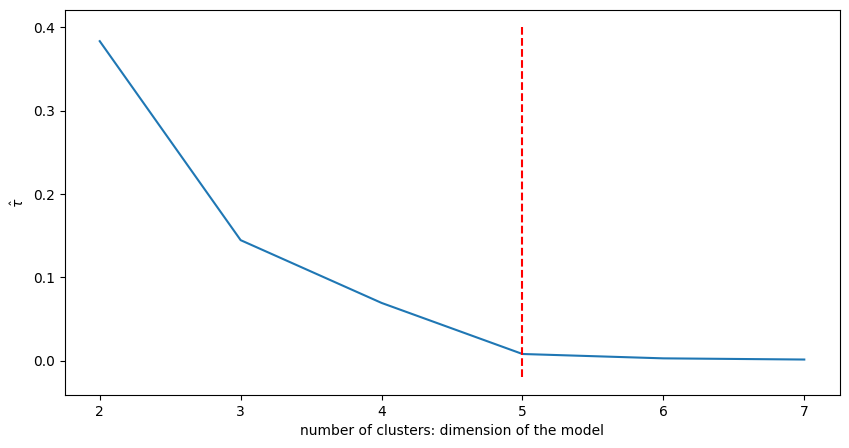

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (8.5, 6.5))
sns.lineplot(data = tau_output, x = 'num_clusters', y = 'tau_estimates')
ax.vlines(x = 5, ymin =-.02, ymax = 0.4, color = 'red', linestyles='--')
ax.set_xlabel('number of clusters: dimension of the model')
ax.set_ylabel('$\\hat{\\tau}$')
plt.show()
fig.savefig('cluster_tau_num.png')

In [66]:
tau_est.tau_LB

1.776400991361352e-15

In [103]:
clustering.get_projected_beta_hat(5).round(3)

array([ 0.954,  0.992,  0.992,  0.992,  0.122,  0.122,  1.178, -0.34 ])

In [102]:
clustering.get_projected_beta_hat_var(5)

array([[ 0.01714786, -0.01714786, -0.01714786, -0.01714786,  0.01714786,
         0.01714786,  0.01714786, -0.01714786],
       [-0.01714786,  0.02193938,  0.02193938,  0.02193938, -0.0267309 ,
        -0.0267309 , -0.0267309 ,  0.03152242],
       [-0.01714786,  0.02193938,  0.02193938,  0.02193938, -0.0267309 ,
        -0.0267309 , -0.0267309 ,  0.03152242],
       [-0.01714786,  0.02193938,  0.02193938,  0.02193938, -0.0267309 ,
        -0.0267309 , -0.0267309 ,  0.03152242],
       [ 0.01714786, -0.0267309 , -0.0267309 , -0.0267309 ,  0.0433912 ,
         0.0433912 ,  0.03631394, -0.06005149],
       [ 0.01714786, -0.0267309 , -0.0267309 , -0.0267309 ,  0.0433912 ,
         0.0433912 ,  0.03631394, -0.06005149],
       [ 0.01714786, -0.0267309 , -0.0267309 , -0.0267309 ,  0.03631394,
         0.03631394,  0.04533014, -0.05491318],
       [-0.01714786,  0.03152242,  0.03152242,  0.03152242, -0.06005149,
        -0.06005149, -0.05491318,  0.1146444 ]])

In [106]:
print(pd.DataFrame(clustering.get_projected_beta_hat_var(5)).to_latex(index = True, columns = None, float_format = "%.3f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\midrule
0 & 0.017 & -0.017 & -0.017 & -0.017 & 0.017 & 0.017 & 0.017 & -0.017 \\
1 & -0.017 & 0.022 & 0.022 & 0.022 & -0.027 & -0.027 & -0.027 & 0.032 \\
2 & -0.017 & 0.022 & 0.022 & 0.022 & -0.027 & -0.027 & -0.027 & 0.032 \\
3 & -0.017 & 0.022 & 0.022 & 0.022 & -0.027 & -0.027 & -0.027 & 0.032 \\
4 & 0.017 & -0.027 & -0.027 & -0.027 & 0.043 & 0.043 & 0.036 & -0.060 \\
5 & 0.017 & -0.027 & -0.027 & -0.027 & 0.043 & 0.043 & 0.036 & -0.060 \\
6 & 0.017 & -0.027 & -0.027 & -0.027 & 0.036 & 0.036 & 0.045 & -0.055 \\
7 & -0.017 & 0.032 & 0.032 & 0.032 & -0.060 & -0.060 & -0.055 & 0.115 \\
\bottomrule
\end{tabular}



In [19]:
clustering.summary_table

,x1,x2,x3,group_means,mse,count
0,0,0,0,0.954075,1.131759,66
1,0,0,1,1.964473,0.988754,68
2,0,1,0,1.889128,0.935859,86
3,0,1,1,4.116812,0.820474,91
4,1,0,0,1.985349,1.327582,75
5,1,0,1,3.102546,0.978911,64
6,1,1,0,3.018307,1.015056,78
7,1,1,1,5.012698,1.227430,72


In [84]:
class anova_clustering(base_barcode):
    def __init__(self, X, y):
        super().__init__(X, y)
        self.clean_data()
        self.estimator = one_way_ANOVA()
        self.fit()

    def clean_data(self):
        full_df = self.X.copy()
        full_df['y'] = self.y.reshape(-1)
        sorted_index = full_df.sort_values(full_df.columns.tolist()[:-1]).index.tolist()
        self.full_df = full_df.loc[sorted_index, :].reset_index(drop = True)
        self.barcode_df = pd.DataFrame(zip(self.barcode.reshape(-1), self.y.reshape(-1)), columns = ['z','y']).loc[sorted_index, :].reset_index(drop = True)
        self.X = full_df.iloc[:, :-1]
        self.y = full_df.y.to_numpy().reshape(-1,1)
        del sorted_index
        del full_df
        
    def fit(self):   
        self.estimator.fit(self.full_df)
        self._summary_table = self.estimator._summary_table
        self._fit = True

    def gen_clustering_summary_table(self, num_clusters):
        original_summary = self.summary_table.copy()
        original_summary = original_summary.drop(['group_means','mse', 'count'], axis = 1)
        original_summary['y_pred'] = self.get_projected_mu_hat(num_clusters)
        full_df = self.full_df.copy()
        full_df = full_df.merge(original_summary, on = self.estimator.independet_var_name, how = 'left')
        return full_df
    
    def metric_after_clustering(self, num_clusters, metric = r2_score):
        full_df = self.gen_clustering_summary_table(num_clusters)
        return metric(full_df.y, full_df.y_pred)



    @property
    def summary_table(self):
        if hasattr(self, "_summary_table"):
            pass
        else:
            self._summary_table = self.predict_from_training()
        return self._summary_table
    
    @property
    def init_mu_hat(self):
        if hasattr(self, "_init_mu_hat"):
            pass
        else:
            self._init_mu_hat = self.summary_table.group_means.tolist()
            self._init_mu_hat = np.array(self._init_mu_hat).reshape(-1)
        return self._init_mu_hat
    
    @property
    def init_mu_var(self):
        if hasattr(self, "_init_mu_var"):
            pass
        else:
            self._init_mu_var = np.diag(self.summary_table.mse/self.summary_table['count'])
        return self._init_mu_var
    
    @property
    def init_beta_hat(self):
        if hasattr(self, "_init_beta_hat"):
            pass
        else:
            self._init_beta_hat = self.L_inv @ self.init_mu_hat
        return self._init_beta_hat

    @property
    def init_beta_var(self):
        if hasattr(self, "_init_beta_var"):
            pass
        else:
            self._init_beta_var = self.L_inv @ self.init_mu_var @ self.L_inv.T
        return self._init_beta_var

    @property
    def clustering_init_kwargs(self):
        summary = self.summary_table
        kwargs = {"means": summary.group_means.tolist(), "variances": summary.mse.tolist(), "sample_sizes": summary['count'].tolist()}
        return kwargs
    
    @property
    def init_cluster_idx(self):
        if hasattr(self, "_init_cluster_idx"):
            pass
        else:
            sample_sizes = self.clustering_init_kwargs['sample_sizes']
            clusters = []
            last = 0
            for n in sample_sizes:
                clusters.append([x for x in range(last, n+last)])
                last += n
            self._init_cluster_idx = clusters
        return self._init_cluster_idx

    @property
    def init_pdist(self):
        if hasattr(self, "_init_pdist"):
            pass
        else:
            self._init_pdist = self.pairwise_distances_from_means_variances(**self.clustering_init_kwargs)
        return self._init_pdist

    def cluster(self, n_clusters, save = True):
        self.last_n_clusters = n_clusters
        pdist = self.init_pdist.copy()
        init_cluster_idx = self.init_cluster_idx.copy()
        result = self.agglomerative_clustering(pairwise_distances = pdist, n_clusters = n_clusters, clusters = init_cluster_idx)
        cluster_idx = result[0]
        final_pdist = result[1]
        cluster_df = {}
        for cluster_id, cluster_index in enumerate(cluster_idx):
            cluster_id_name = f"cluster_{cluster_id}"
            cluster_df[cluster_id_name] = self.full_df.loc[cluster_index,:].copy()
            cluster_df[cluster_id_name] = cluster_df[cluster_id_name].groupby(self.original_columns).agg(np.mean).reset_index()
            cluster_df[cluster_id_name]['barcode'] = self.gen_barcode((cluster_df[cluster_id_name].loc[:, self.original_columns]))
        if save:
            self._latest_cluster_dfs = cluster_df
        else:
            self._latest_cluster_dfs = None
        
        return {"cluster": cluster_df, "final_pdist": final_pdist}

    def gen_mu_contrast_from_cluster(self, n_clusters, use_latest_cluster_df = True):
        if use_latest_cluster_df:
            if hasattr(self, '_latest_cluster_dfs'):
                if (self._latest_cluster_dfs != None) & (self.last_n_clusters == n_clusters):
                    cluster_df_list = self._latest_cluster_dfs
        try:
            cluster_df_list
        except:
            cluster_result = self.cluster(n_clusters = n_clusters)
            cluster_df_list = cluster_result['cluster']
            
        contrast_matrix = 0
        for cluster_name, cluster_df in cluster_df_list.items():
            if cluster_df.shape[0] > 1:
                contrast = np.zeros((cluster_df.shape[0]-1, 2**len(self.original_columns)))
                for i, row in enumerate(contrast):
                    row[cluster_df.barcode[0]] = 1
                    row[cluster_df.barcode[i+1]] = -1
                    contrast[i] = row
                if isinstance(contrast_matrix, np.ndarray):
                    contrast_matrix = np.concatenate([contrast_matrix, contrast], axis = 0)
                else:
                    contrast_matrix = contrast
            else:
                pass
        return contrast_matrix
    
    def gen_projection_matrix_mu(self, n_clusters):
        C = self.gen_mu_contrast_from_cluster(n_clusters)
        projection_matrix = C.T @ np.linalg.inv(C @ C.T) @ C
        projection_matrix = np.identity(C.shape[1]) - projection_matrix
        return projection_matrix
    
    def get_projected_mu_hat(self, n_clusters):
        mu = self.init_mu_hat
        proj_mu = self.gen_projection_matrix_mu(n_clusters = n_clusters) @ mu
        return proj_mu
    
    def get_projected_mu_hat_var(self, n_clusters):
        mu_var = self.init_mu_var
        proj = self.gen_projection_matrix_mu(n_clusters = n_clusters)
        proj_mu_var = proj @ mu_var @ proj.T
        return proj_mu_var
    
    def get_projected_beta_hat(self, n_clusters):
        proj_mu = self.get_projected_mu_hat(n_clusters = n_clusters)
        proj_beta = self.L_inv @ proj_mu
        return proj_beta
    
    def get_projected_beta_hat_var(self, n_clusters):
        mu_var = self.get_projected_mu_hat_var(n_clusters)
        return self.L_inv @ mu_var @ self.L_inv.T

    
    def ward_linkage(self, pairwise_distances, clusters, merge_indices):
        clusters = clusters.copy()
        i, j = merge_indices
        cluster_i = clusters[i]
        cluster_j = clusters[j]
        n_i = len(cluster_i)
        n_j = len(cluster_j)
        n = pairwise_distances.shape[1]
        new_distances = pairwise_distances.copy()
        new_distances = np.delete(new_distances, merge_indices, axis = 0)
        new_distances = np.delete(new_distances, merge_indices, axis = 1)
        new_distances = np.append(new_distances, np.zeros((1, new_distances.shape[1])), axis = 0)
        new_distances = np.append(new_distances,  np.zeros((new_distances.shape[0], 1)), axis = 1)
        clusters.append(cluster_i + cluster_j)
        clusters.remove(cluster_i)
        clusters.remove(cluster_j)
        col = 0
        
        for k in range(n):  # Subtract 2 because we've already added a row and column
            if k != i and k != j:
                n_k = len(clusters[col])
                n_all = n_i + n_j + n_k
                dist_ik = pairwise_distances[i, k]*(n_k + n_i)/n_all
                dist_jk = pairwise_distances[j, k]*(n_j + n_k)/n_all
                dist_ij = pairwise_distances[i, j]*(n_k)/n_all
                new_dist = dist_ik + dist_jk - dist_ij
                # Add other linkage methods here if needed
                
                new_distances[-1, col] = new_dist
                new_distances[col, -1] = new_dist
                col += 1

        return new_distances, clusters
    
    def gen_reduced_clustering(self, n_clusters):
        return self.agglomerative_clustering(pairwise_distances= self.init_pdist, n_clusters = n_clusters)

    def agglomerative_clustering(self, pairwise_distances, n_clusters, clusters = None, estimator = None):
        n = pairwise_distances.shape[0]
        if clusters:
            pass
        else:
            clusters = [[i] for i in range(n)]
        
        assert len(clusters) == n
        
        for k in range(n - n_clusters):
            min_dist = np.inf
            merge_indices = None
            
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    dist = pairwise_distances[i, j]
                    if dist < min_dist:
                        min_dist = dist
                        merge_indices = (i, j)
            
            if merge_indices:
                pairwise_distances, clusters = self.ward_linkage(pairwise_distances, clusters, merge_indices)
        
        return clusters, pairwise_distances
    
    def pairwise_distances_from_means_variances(self, means, variances, sample_sizes):
        num_clusters = len(means)
        pairwise_distances = np.zeros((num_clusters, num_clusters))
        
        for i in range(num_clusters):
            for j in range(i + 1, num_clusters):
                n_i = sample_sizes[i]
                n_j = sample_sizes[j]
                mean_i = means[i]
                mean_j = means[j]
                var_i = variances[i]
                var_j = variances[j]
                
                # Calculate the pairwise distance using Ward linkage formula
                numerator = (n_i * n_j / (n_i + n_j)) * (mean_i - mean_j)**2
                denominator = np.sqrt((n_i * var_i + n_j * var_j) / (n_i + n_j))
                
                pairwise_distances[i, j] = np.sqrt(numerator / denominator)
                pairwise_distances[j, i] = pairwise_distances[i, j]
        
        return pairwise_distances


In [5]:
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics      import r2_score

import numpy as np; import pandas as pd
from typing import List, Union

# itertools
from itertools import combinations

from utils import *

class one_way_ANOVA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, df, response_var_name =None):
        if response_var_name:
            try:
                df[response_var_name]
                self.response_var_name = response_var_name
            except:
                self.response_var_name = df.columns.tolist()[-1]
        else:
            self.response_var_name = df.columns.tolist()[-1]
        self.independet_var_name = df.columns[~df.columns.str.contains(self.response_var_name)].tolist()
        self.segment_means = df.groupby(self.independet_var_name)[self.response_var_name].mean().reset_index()
        self.segment_means.columns= self.segment_means.columns.tolist()[:-1] + ['y_hat']
        output = df.merge(self.segment_means, how = 'left', on = self.independet_var_name)
        y = output[self.response_var_name].to_numpy().reshape(-1)
        y_pred = output['y_hat'].to_numpy().reshape(-1)
        self._rsq = r2_score(y, y_pred)
        self.sse  = np.square(y - y_pred).sum()
        self.MSE_ = self.sse/(y.shape[0])
        output['sq'] = (output.y_hat - output[self.response_var_name])**2
        summary = output.groupby(self.independet_var_name).agg({"y_hat": np.mean, "sq": [lambda x: x.sum()/x.count(), 'count']}).reset_index()
        summary.columns = self.independet_var_name + ['group_means','mse','count']
        self._summary_table = summary
        return self
    

    @property
    def score(self):
        if hasattr(self, '_rsq'):
            return self._rsq
        else:
            raise AttributeError("fit the estimator first")
    
    @property
    def MSE(self):
        if hasattr(self, "MSE_"):
            return self.MSE_
        else:
            raise AttributeError("fit the estimator first")

# Fishers Importance Score

In [1]:
from glob import glob
import pandas as pd
from dask import dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("../importance_score/sample_generator_config_i_10.pickle", 'rb') as pickle_file:
    config = pickle.load(pickle_file)

In [3]:
all_csv_files = glob('clustering_test_*.csv')

In [10]:
import re
optimal = [x for x in all_csv_files if re.match(r".*_cluster.*.csv", x)]
reduced = [x for x in all_csv_files if not re.match(r".*_cluster.*.csv", x)]

In [12]:
names = [name.split(',') for name in config['_interactions_coefficients'].keys()]

In [13]:
for name in names:
    name[0] = name[0].split('_')[1]

In [14]:
beta_names = []
for name in names:
    beta_names.append('*'.join([f"beta{i}" for i in name]))

In [56]:
ddf = dd.read_csv(filepath)
columns = ddf.columns[ddf.columns.str.contains('\*')].tolist() + ['score']
ddf = ddf.loc[:, columns].sort_values(['score'], ascending = False).reset_index(drop = True)


In [61]:
ranking = result.reset_index(); ranking.columns = ['coefficients', 'score']

In [63]:
ranking['ranking'] = ranking.score.rank(ascending = False, method = 'min')
true_variables = ranking.loc[ranking.coefficients.isin(beta_names),['coefficients','ranking']].reset_index(drop = True)
false_variables = ranking.loc[~ranking.coefficients.isin(beta_names),['coefficients','ranking']].reset_index(drop = True)

In [64]:
true_variables

,coefficients,ranking
0,beta2*beta4,4.0
1,beta1*beta3,6.0
2,beta1*beta4,10.0
3,beta4*beta5,14.0
4,beta1*beta2*beta3*beta4,17.0
5,beta3*beta4*beta5,20.0
6,beta1*beta3*beta4,21.0
7,beta2*beta3*beta4*beta5,24.0
8,beta2*beta3*beta4,25.0
9,beta3*beta4,26.0


In [66]:
false_variables

,coefficients,ranking
0,beta1*beta2*beta3*beta4*beta5,1.0
1,beta2*beta3,2.0
2,beta1*beta3*beta5,3.0
3,beta1*beta2*beta4*beta5,5.0
4,beta1*beta2*beta3,7.0
5,beta1*beta2,8.0
6,beta1*beta2*beta5,9.0
7,beta2*beta3*beta5,11.0
8,beta1*beta4*beta5,12.0
9,beta1*beta5,13.0


In [16]:
def return_plot_df(file_path_list, beta_names= beta_names):
    from tqdm import tqdm
    from sympy import Symbol
    from sympy.printing import latex

    for i, filepath in tqdm(enumerate(file_path_list), total = 10):
        ddf = dd.read_csv(filepath)
        columns = ddf.columns[ddf.columns.str.contains('\*')].tolist() + ['score']
        ddf = ddf.loc[:, columns].sort_values(['score'], ascending = False).reset_index(drop = True)
        ddf = ddf.loc[ddf.loc[:, ddf.columns.str.contains('beta')].apply(lambda x: sum(x) <= 7, axis = 1, meta=(None, 'bool')), :]
        df = ddf.reset_index(drop = True).compute()
        result = df.apply(np.average, weights = df.score, axis = 0).sort_values(ascending = False) * df.score.sum()
        result.pop('score')
        ranking = pd.DataFrame(zip(result.index.tolist(), result), columns = ['coefficients', 'score'])
        ranking['ranking'] = ranking.score.rank(ascending = False, method = 'min')
        true_variables = ranking.loc[ranking.coefficients.isin(beta_names),['coefficients','ranking']].reset_index(drop = True)
        false_variables = ranking.loc[~ranking.coefficients.isin(beta_names),['coefficients','ranking']].reset_index(drop = True)
        if i:
            true_variables.rename(columns = {'ranking': f"ranking_iter_{i}"}, inplace = True)
            final_true = final_true.merge(true_variables, on = "coefficients")
            false_variables.rename(columns = {'ranking': f"ranking_iter_{i}"}, inplace = True)
            final_false = final_false.merge(false_variables, on = 'coefficients')
        else:
            final_true = true_variables
            final_true.rename(columns = {'ranking': f"ranking_iter_{i}"}, inplace = True)
            final_false = false_variables
            final_false.rename(columns = {'ranking': f"ranking_iter_{i}"}, inplace = True)
        del ddf
        del df
    final_true['mean_ranking'] = final_true.set_index('coefficients').mean(axis = 1).to_list()
    final_false['mean_ranking'] = final_false.set_index('coefficients').mean(axis = 1).to_list()
    final_true['true'] = True
    final_false['true'] = False
    plot_df = pd.concat([final_true, final_false])[['coefficients','mean_ranking', 'true']].sort_values(['true','mean_ranking'], ascending = [False, True]).reset_index(drop = True)
    # plot_df.coefficients = plot_df.coefficients.apply(lambda x: f"${latex(Symbol(x))}$")
    return plot_df


In [27]:
optimal_plot_df = return_plot_df(optimal)
reduced_plot_df = return_plot_df(reduced)

100%|██████████| 10/10 [00:41<00:00,  4.11s/it]


In [28]:
# plot_df['mean_ranking'] = plot_df.mean_ranking -4

In [29]:
import seaborn as sns
from sympy import Symbol
from sympy.printing import latex


In [30]:
optimal_plot_df.coefficients = optimal_plot_df.coefficients.str.replace('*beta',',').str.replace('beta','beta_{') + '}'
optimal_plot_df.coefficients = optimal_plot_df.coefficients.apply(lambda x: f"${latex(Symbol(x))}$")
reduced_plot_df.coefficients = reduced_plot_df.coefficients.str.replace('*beta',',').str.replace('beta','beta_{') + '}'
reduced_plot_df.coefficients = reduced_plot_df.coefficients.apply(lambda x: f"${latex(Symbol(x))}$")

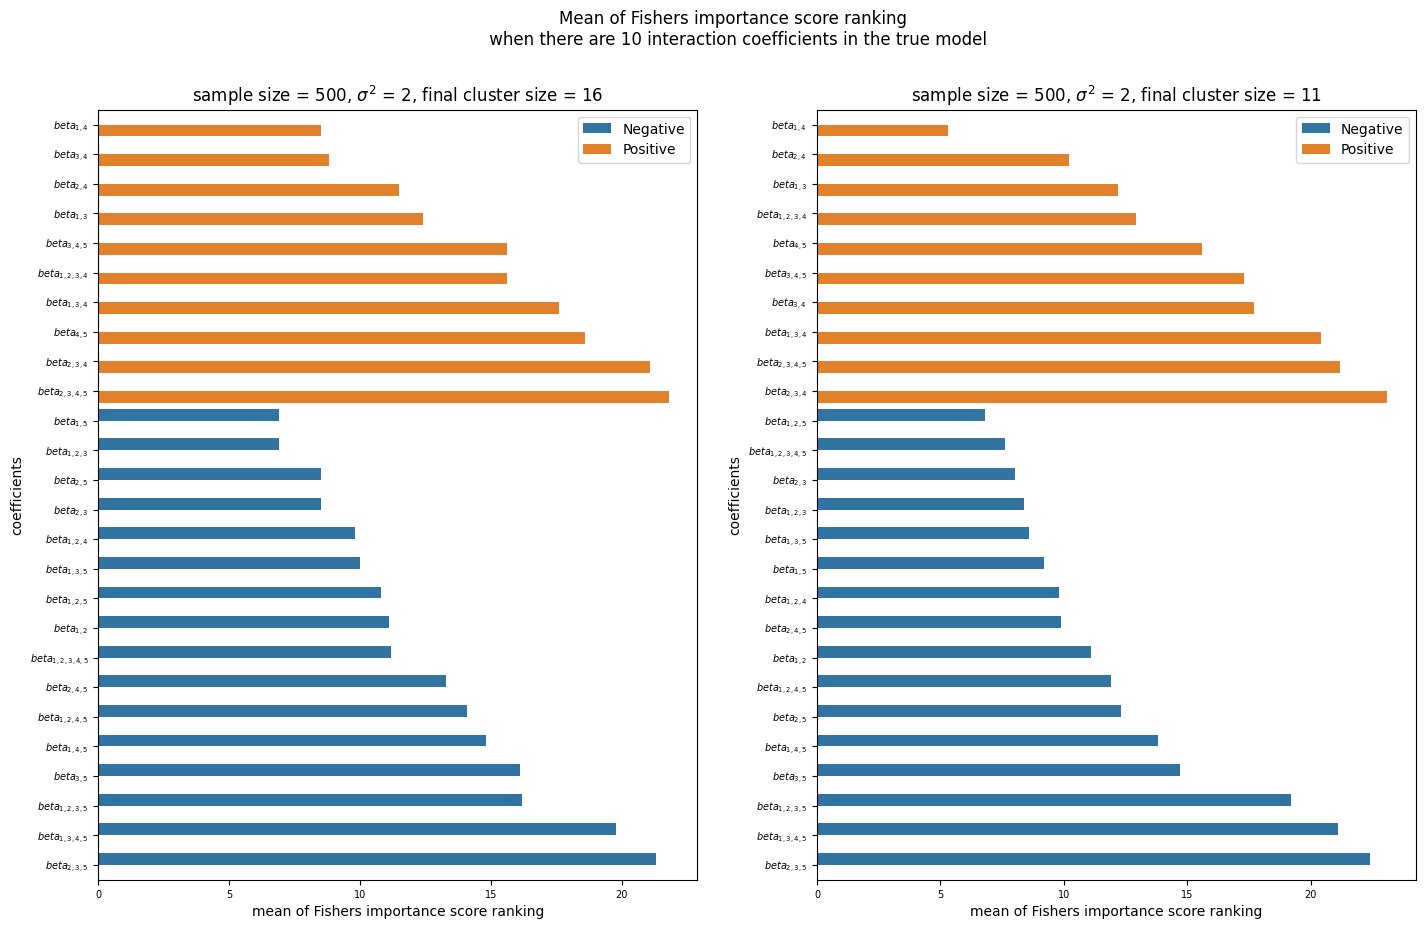

In [37]:

fig, ax = plt.subplots(1, 2, figsize = (8.5,10))
# plot_df = return_plot_df(all_csv_files)
sns.barplot(optimal_plot_df, y = 'coefficients' ,x = 'mean_ranking', hue = 'true', orient = 'h', ax = ax[0])
sns.barplot(reduced_plot_df, y = 'coefficients' ,x = 'mean_ranking', hue = 'true', orient = 'h', ax = ax[1])
for i in range(2):
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, ['Negative','Positive'])
    ax[i].tick_params(axis='both', which='major', labelsize=7)
    ax[i].set_xlabel("mean of Fishers importance score ranking")
    ax[i].tick_params(axis='both', which='major', labelsize=7)
    ax[i].set_xlabel("mean of Fishers importance score ranking")
ax[0].set_title(f"sample size = {500}, ${latex(Symbol('sigma^2'))}$ = {2}, final cluster size = 16")
ax[1].set_title(f"sample size = {500}, ${latex(Symbol('sigma^2'))}$ = {2}, final cluster size = 11")
fig.suptitle(f"Mean of Fishers importance score ranking \n when there are 10 interaction coefficients in the true model")
fig.savefig('cluster_results.png')
plt.show()